<a href="https://colab.research.google.com/github/Nsi20/Super-Market-Analysis/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

uploaded = files.upload()

import pandas as pd

df = pd.read_csv('SuperMarket Analysis.csv')

df.head()


Saving SuperMarket Analysis.csv to SuperMarket Analysis.csv


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

# **Level 2.**

# TASK 1: Analyze Customer Segmentation Data

- Use clustering techniques (e.g., K-Means) or Excel Pivot Tables to segment
customers.



1. Data Preprocessing

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Selecting relevant columns for clustering
df_cluster = df[['Customer type', 'Gender', 'Product line', 'Sales', 'Quantity', 'Payment', 'Rating']]

# Encoding categorical variables
label_encoders = {}
for column in ['Customer type', 'Gender', 'Product line', 'Payment']:
    le = LabelEncoder()
    df_cluster[column] = le.fit_transform(df_cluster[column])
    label_encoders[column] = le

# Standardizing numerical features
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)


<ipython-input-4-765c62fe1c48>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster[column] = le.fit_transform(df_cluster[column])
<ipython-input-4-765c62fe1c48>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster[column] = le.fit_transform(df_cluster[column])
<ipython-input-4-765c62fe1c48>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

2. Applying K-Means and Using the Elbow Method

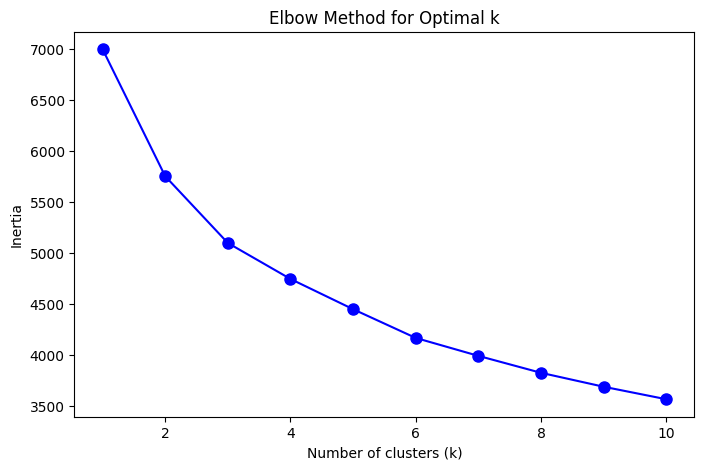

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to find the optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


3. Fitting K-Means and Visualizing Clusters

<ipython-input-6-9b1a91ae98dd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['Cluster'] = kmeans.fit_predict(df_cluster_scaled)


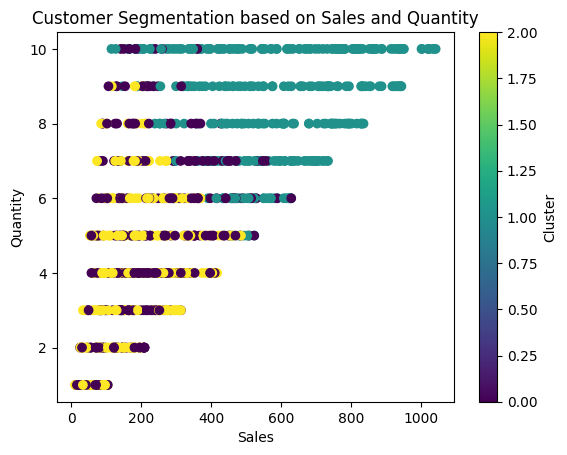

In [6]:
# Let's assume the optimal number of clusters is 3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(df_cluster_scaled)

# Visualizing the clusters
plt.scatter(df_cluster['Sales'], df_cluster['Quantity'], c=df_cluster['Cluster'], cmap='viridis')
plt.xlabel('Sales')
plt.ylabel('Quantity')
plt.title('Customer Segmentation based on Sales and Quantity')
plt.colorbar(label='Cluster')
plt.show()


# - Create visualizations (e.g., pie charts, bar graphs) to show the different customer groups.

1. Pie Chart: Distribution of Customer Groups

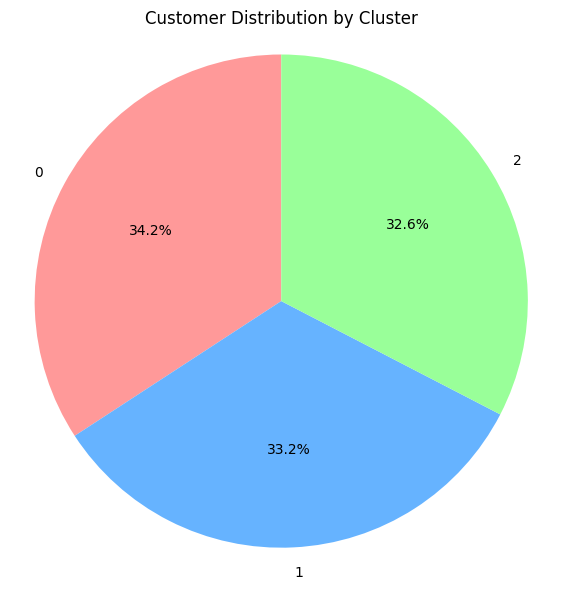

In [7]:
import matplotlib.pyplot as plt

# Pie chart for cluster distribution
cluster_counts = df_cluster['Cluster'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Customer Distribution by Cluster')
plt.axis('equal')
plt.show()


2. Bar Graph: Average Sales and Quantity per Cluster

<ipython-input-8-e23d95cf914f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Sales', data=cluster_averages, palette='viridis')


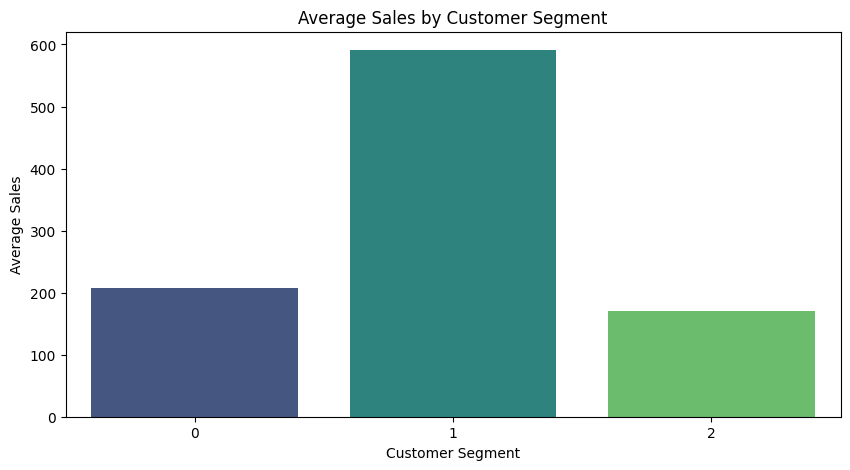

<ipython-input-8-e23d95cf914f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Quantity', data=cluster_averages, palette='viridis')


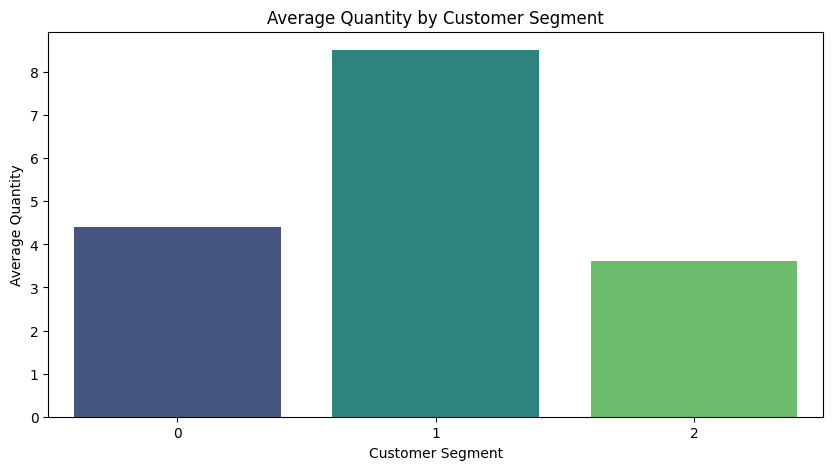

In [8]:
import seaborn as sns

# Grouping by cluster to find the average sales and quantity
cluster_averages = df_cluster.groupby('Cluster').mean()[['Sales', 'Quantity']].reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='Cluster', y='Sales', data=cluster_averages, palette='viridis')
plt.title('Average Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Sales')
plt.show()

# Bar plot for average quantity
plt.figure(figsize=(10, 5))
sns.barplot(x='Cluster', y='Quantity', data=cluster_averages, palette='viridis')
plt.title('Average Quantity by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Quantity')
plt.show()


3. Scatter Plot: Sales vs. Quantity by Cluster

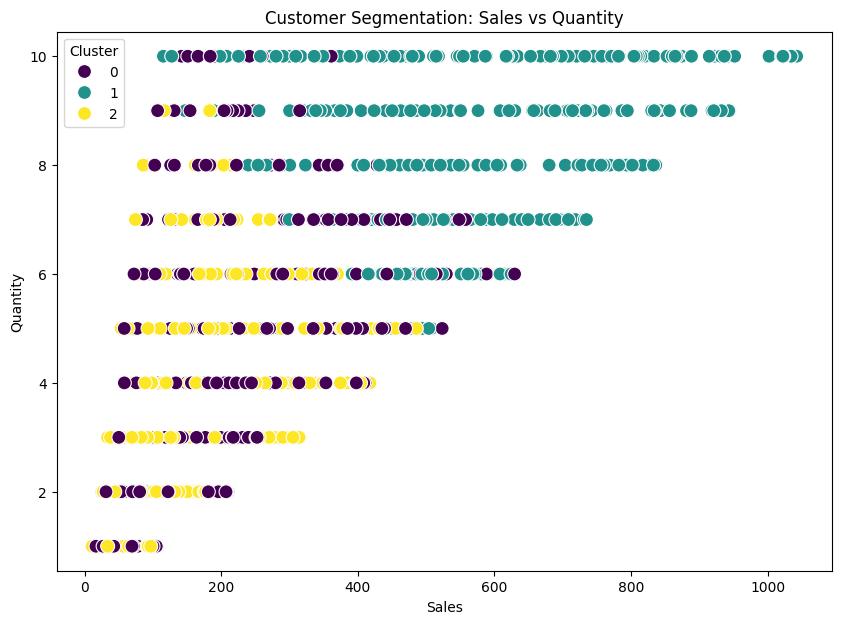

In [9]:
# Scatter plot to visualize clusters based on Sales and Quantity
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Sales', y='Quantity', hue='Cluster', data=df_cluster, palette='viridis', s=100)
plt.title('Customer Segmentation: Sales vs Quantity')
plt.xlabel('Sales')
plt.ylabel('Quantity')
plt.legend(title='Cluster')
plt.show()


# **Bar Graph: Average Rating per Cluster**

<ipython-input-10-2d5f00a21a40>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Rating', data=cluster_ratings, palette='coolwarm')


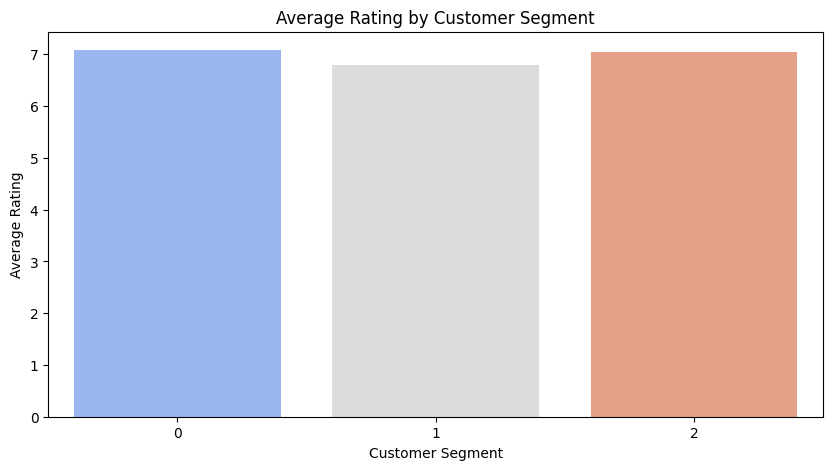

In [10]:
# Grouping by cluster to find the average rating
cluster_ratings = df_cluster.groupby('Cluster').mean()[['Rating']].reset_index()

# Bar plot for average rating
plt.figure(figsize=(10, 5))
sns.barplot(x='Cluster', y='Rating', data=cluster_ratings, palette='coolwarm')
plt.title('Average Rating by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Rating')
plt.show()


## Stacked Bar Chart: Payment Methods Distribution per Cluster

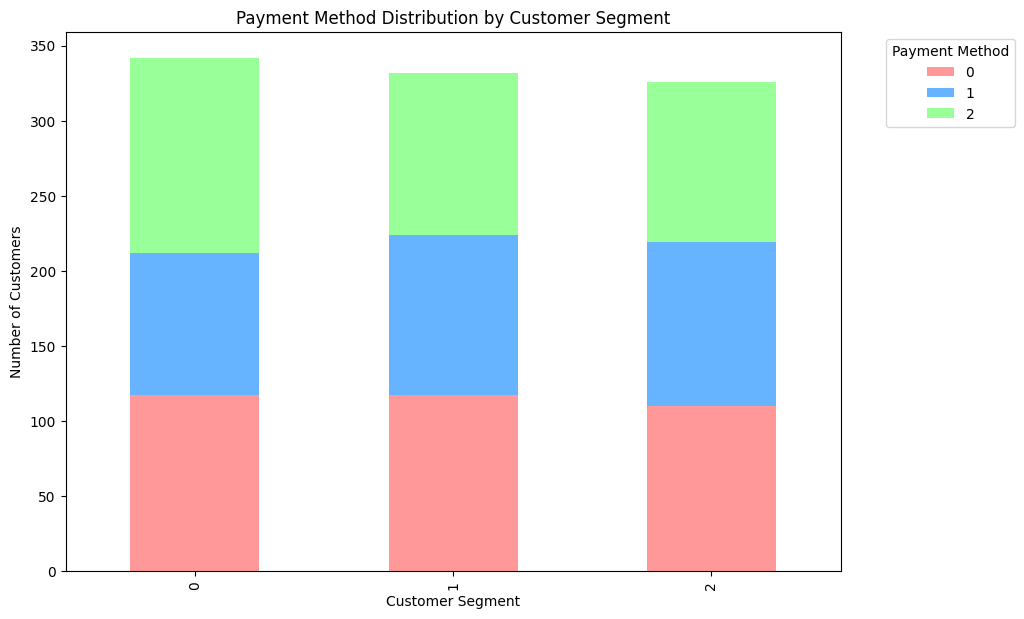

In [11]:
# Counting payment methods per cluster
payment_counts = df_cluster.groupby(['Cluster', 'Payment']).size().unstack()

# Stacked bar chart for payment methods per cluster
payment_counts.plot(kind='bar', stacked=True, figsize=(10, 7), color=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Payment Method Distribution by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Box Plot: Rating Distribution Across Clusters

<ipython-input-12-2779215be876>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Rating', data=df_cluster, palette='Set3')


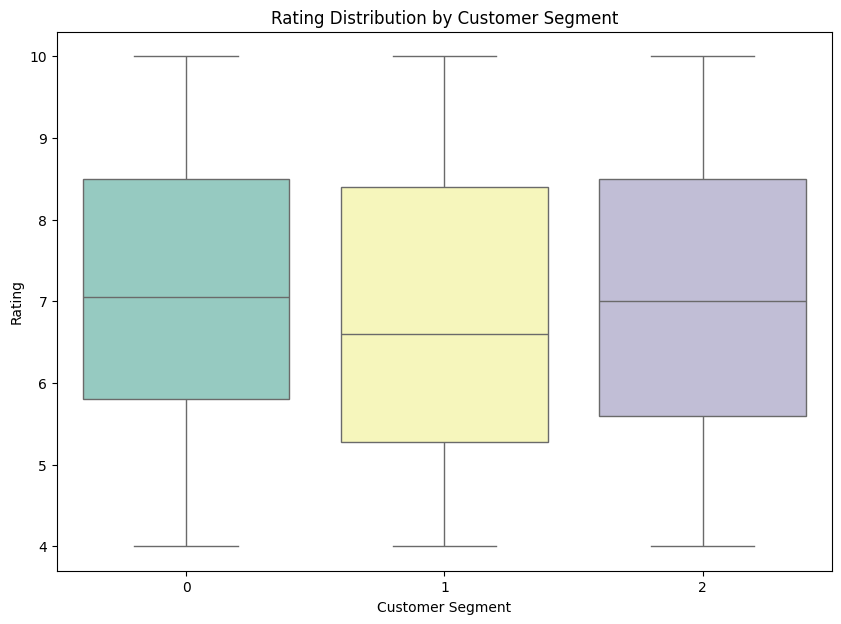

In [12]:
# Box plot for rating distribution across clusters
plt.figure(figsize=(10, 7))
sns.boxplot(x='Cluster', y='Rating', data=df_cluster, palette='Set3')
plt.title('Rating Distribution by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Rating')
plt.show()


4. Bar Graph: Payment Method Breakdown per Cluster

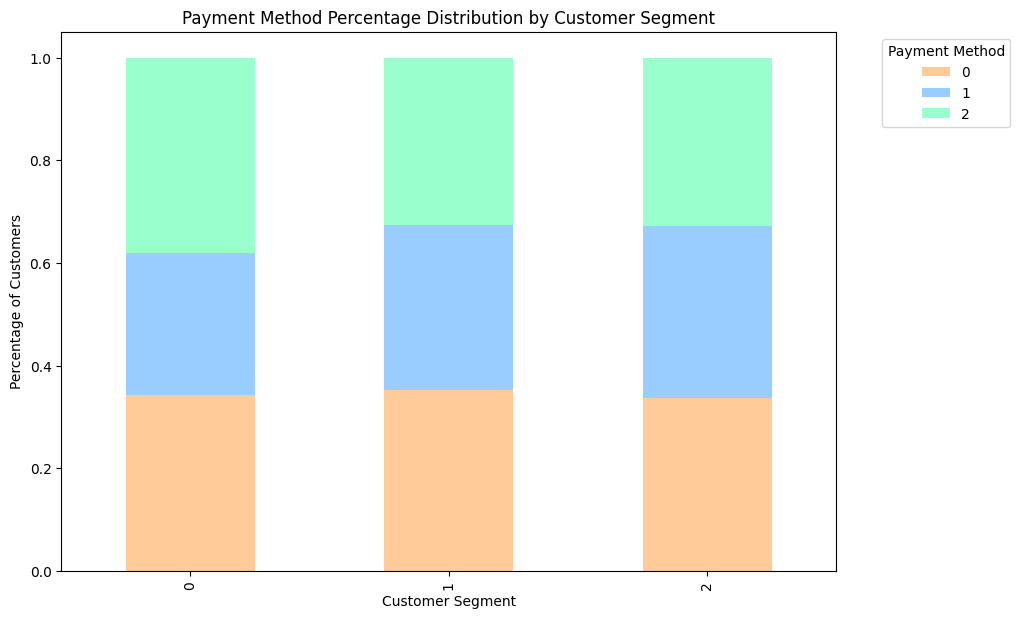

In [13]:
payment_percent = payment_counts.div(payment_counts.sum(axis=1), axis=0)

# Stacked bar chart for payment method percentage per cluster
payment_percent.plot(kind='bar', stacked=True, figsize=(10, 7), color=['#ffcc99', '#99ccff', '#99ffcc'])
plt.title('Payment Method Percentage Distribution by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Percentage of Customers')
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
